In [1]:
import pandas as pd

df = pd.read_parquet("initial_samples.parquet")
# df = pd.read_parquet("active_labeled.parquet")
df

,filepath,label
0,data/imagenette/2/00710.jpg,cassette player
1,data/imagenette/2/00063.jpg,cassette player
2,data/imagenette/2/00506.jpg,cassette player
3,data/imagenette/2/00575.jpg,cassette player
4,data/imagenette/2/00136.jpg,cassette player
...,...,...
95,data/imagenette/5/08926.jpg,French horn
96,data/imagenette/5/09359.jpg,French horn
97,data/imagenette/5/08999.jpg,French horn
98,data/imagenette/5/08777.jpg,French horn


In [2]:
from active_vision import ActiveLearner

al = ActiveLearner("resnet18")

2025-01-13 15:09:04.688 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [3]:
al.load_dataset(df, filepath_col="filepath", label_col="label")

2025-01-13 15:09:11.997 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-13 15:09:11.998 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-13 15:09:12.571 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-13 15:09:12.702 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


In [4]:
al.train_set

,filepath,label
0,data/imagenette/2/00710.jpg,cassette player
1,data/imagenette/2/00063.jpg,cassette player
2,data/imagenette/2/00506.jpg,cassette player
3,data/imagenette/2/00575.jpg,cassette player
4,data/imagenette/2/00136.jpg,cassette player
...,...,...
95,data/imagenette/5/08926.jpg,French horn
96,data/imagenette/5/09359.jpg,French horn
97,data/imagenette/5/08999.jpg,French horn
98,data/imagenette/5/08777.jpg,French horn


2025-01-13 15:09:16.970 | INFO     | active_vision.core:lr_find:65 - Finding optimal learning rate


2025-01-13 15:09:30.162 | INFO     | active_vision.core:lr_find:67 - Optimal learning rate: 0.0010000000474974513


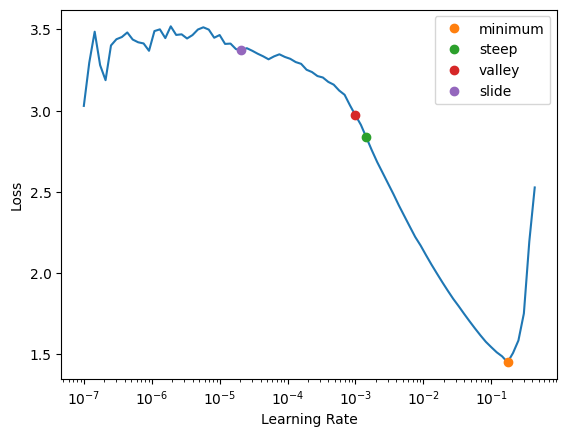

In [5]:
al.lr_find()

2025-01-13 15:09:37.101 | INFO     | active_vision.core:train:70 - Training for 3 epochs with learning rate: 0.001


epoch,train_loss,valid_loss,accuracy,time
0,3.069235,1.706487,0.350000,00:01


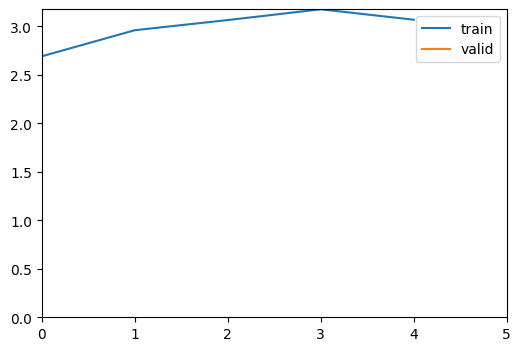

epoch,train_loss,valid_loss,accuracy,time
0,2.398752,1.098564,0.550000,00:01
1,2.033276,0.649210,0.750000,00:01
2,1.682352,0.562477,0.800000,00:01


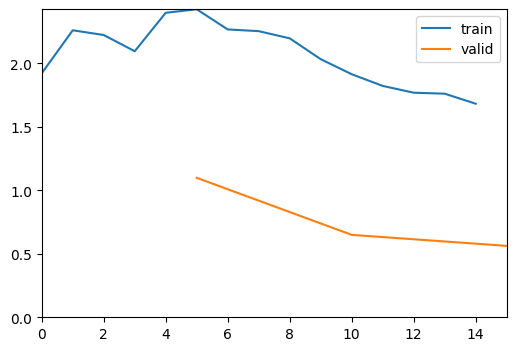

In [6]:
al.train(epochs=3, lr=1e-3)

## Evaluate the model on a *labeled* evaluation set

In [ ]:
test_df = pd.read_parquet("evaluation_samples.parquet")
test_df = test_df.rename(columns={"label_name": "label"})
al.evaluate(test_df, filepath_col="filepath", label_col="label")


## Get the predictions from an *unlabeled* set

In [8]:
df = pd.read_parquet("unlabeled_samples.parquet")
filepaths = df["filepath"].tolist()

filepaths

['data/imagenette/2/00000.jpg',
 'data/imagenette/2/00001.jpg',
 'data/imagenette/2/00002.jpg',
 'data/imagenette/2/00004.jpg',
 'data/imagenette/2/00005.jpg',
 'data/imagenette/2/00006.jpg',
 'data/imagenette/2/00007.jpg',
 'data/imagenette/2/00008.jpg',
 'data/imagenette/2/00009.jpg',
 'data/imagenette/2/00010.jpg',
 'data/imagenette/2/00011.jpg',
 'data/imagenette/2/00012.jpg',
 'data/imagenette/2/00013.jpg',
 'data/imagenette/2/00014.jpg',
 'data/imagenette/2/00015.jpg',
 'data/imagenette/2/00016.jpg',
 'data/imagenette/2/00017.jpg',
 'data/imagenette/2/00018.jpg',
 'data/imagenette/2/00019.jpg',
 'data/imagenette/2/00020.jpg',
 'data/imagenette/2/00021.jpg',
 'data/imagenette/2/00022.jpg',
 'data/imagenette/2/00023.jpg',
 'data/imagenette/2/00024.jpg',
 'data/imagenette/2/00025.jpg',
 'data/imagenette/2/00026.jpg',
 'data/imagenette/2/00027.jpg',
 'data/imagenette/2/00028.jpg',
 'data/imagenette/2/00029.jpg',
 'data/imagenette/2/00030.jpg',
 'data/imagenette/2/00031.jpg',
 'data/i

In [9]:
len(filepaths)

9369

In [10]:
pred_df = al.predict(filepaths, batch_size=128)
pred_df

2025-01-13 15:10:16.143 | INFO     | active_vision.core:predict:77 - Running inference on 9369 samples


,filepath,pred_label,pred_conf
0,data/imagenette/2/00000.jpg,cassette player,0.170472
1,data/imagenette/2/00001.jpg,cassette player,0.188546
2,data/imagenette/2/00002.jpg,gas pump,0.117991
3,data/imagenette/2/00004.jpg,gas pump,0.133224
4,data/imagenette/2/00005.jpg,cassette player,0.120670
...,...,...,...
9364,data/imagenette/5/09464.jpg,French horn,0.204871
9365,data/imagenette/5/09465.jpg,French horn,0.197264
9366,data/imagenette/5/09466.jpg,French horn,0.228587
9367,data/imagenette/5/09467.jpg,French horn,0.198794


In [11]:
uncertain_df = al.sample_uncertain(pred_df, num_samples=30)
uncertain_df

2025-01-13 15:10:37.258 | INFO     | active_vision.core:sample_uncertain:119 - Getting top 30 low confidence samples


,filepath,pred_label,pred_conf
8394,data/imagenette/6/08484.jpg,tench,0.107145
2098,data/imagenette/3/02120.jpg,church,0.107630
3981,data/imagenette/9/04024.jpg,chain saw,0.108258
4450,data/imagenette/9/04498.jpg,English springer,0.108637
4587,data/imagenette/9/04636.jpg,chain saw,0.108819
343,data/imagenette/2/00348.jpg,garbage truck,0.108853
990,data/imagenette/0/01000.jpg,garbage truck,0.108878
3743,data/imagenette/9/03783.jpg,tench,0.109235
4885,data/imagenette/7/04937.jpg,golf ball,0.109258
6200,data/imagenette/1/06266.jpg,garbage truck,0.109481


## Label the uncertain samples

In [12]:
al.label(uncertain_df, output_filename="uncertain")

2025-01-13 15:10:42.051 | INFO     | active_vision.core:label:151 - Launching labeling interface for 30 samples


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [13]:
labeled_df = pd.read_parquet("uncertain.parquet")

labeled_df


,filepath,label
0,data/imagenette/6/08484.jpg,garbage truck
1,data/imagenette/3/02120.jpg,chain saw
2,data/imagenette/9/04024.jpg,parachute
3,data/imagenette/9/04498.jpg,parachute
4,data/imagenette/9/04636.jpg,parachute
5,data/imagenette/2/00348.jpg,cassette player
6,data/imagenette/0/01000.jpg,tench
7,data/imagenette/9/03783.jpg,parachute
8,data/imagenette/7/04937.jpg,gas pump
9,data/imagenette/1/06266.jpg,English springer


In [14]:
al.add_to_train_set(labeled_df, output_filename="active_labeled")

2025-01-13 15:12:54.481 | INFO     | active_vision.core:add_to_train_set:272 - Adding 30 samples to training set
2025-01-13 15:12:54.484 | INFO     | active_vision.core:add_to_train_set:281 - Saved training set to active_labeled.parquet
